In [ ]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm


all_tokens = {}


def work_one_line(line):

    # convert whole line in lower case
    line = line.lower()

    # replace all kind of punctuation with " "
    line = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@\[\\\]^_`{|}~]", " ", line)

    # remove successive white spaces
    line = re.sub(r"\s+", " ", line)

    tokens = word_tokenize(line)

    tokens = [token for token in tokens if token.isalpha()]

    # print(tokens)

    # define Porter Stemmer from NLTK
    porter_stemmer = PorterStemmer()

    # stem tokenized text and print first 500 tokens
    stemmed_tokens = [porter_stemmer.stem(word) for word in tokens]
    # print(stemmed_tokens)

    return stemmed_tokens


def add_tokens(stemmed_tokens):
    for token in stemmed_tokens:
        if token not in all_tokens:
            all_tokens[token] = 1
        else:
            all_tokens[token] += 1


# print(
#     work_one_line(
#         "A@This is a test sentence! It contains special characters: !\"#\$%&'(or)*+does,it-./:;<=>?@[\]^_`{|}~,"
#     )
# )

with open("passage-collection.txt", "r") as f:
    for line_num, line in enumerate(tqdm(f)):
        # print(line_num, line)
        stemmed_tokens = work_one_line(line)
        add_tokens(stemmed_tokens)
        # if line_num == 500:

        #     break

df = pd.DataFrame.from_dict(all_tokens, orient="index", columns=["Count"])
df = df.reset_index()
df.rename({"index": "1-gram"}, inplace=True)
df.to_csv("passage_collection_stat.csv", index=False)


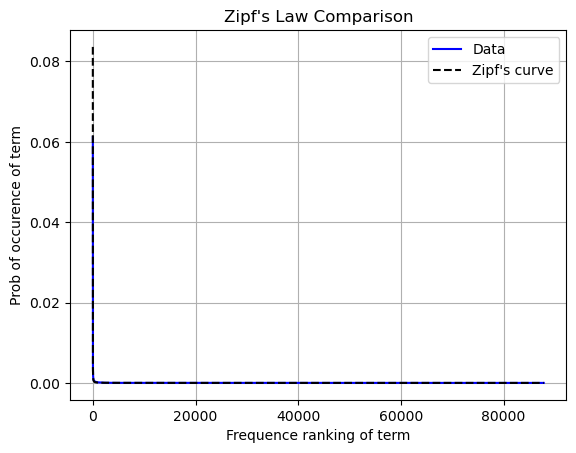

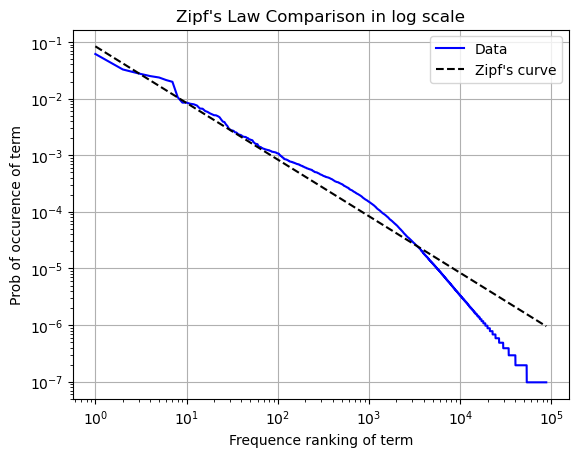

In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("passage_collection_stat.csv")

df_sorted = df.sort_values(by=["Count"], ascending=False)
df_sorted.rename(mapper={"index": "1-gram"}, inplace=True, axis=1)
df_sorted["rank"] = (df.index + 1).astype(float)

total_voc = np.sum(df_sorted["Count"])
df_sorted["Freq"] = df_sorted["Count"] / total_voc
df_sorted["Freq*rank"]= df_sorted["Freq"]* df_sorted["rank"]
df_sorted.to_csv("passage_collection_stats.csv", index=False)

# print(df_sorted.head(20))


Hn= np.sum(np.reciprocal(df_sorted["rank"]))

zipf_freq = np.reciprocal(df_sorted["rank"]* Hn)



plt.title("Zipf's Law Comparison")
plt.xlabel("Frequence ranking of term")
plt.ylabel("Prob of occurence of term")
plt.plot(df_sorted["rank"],df_sorted["Freq"], color='blue', label = "Data")
plt.plot(df_sorted["rank"], zipf_freq, linestyle="--", color='black', label="Zipf's curve")
plt.grid(True, which="major", ls="-")
plt.legend()
plt.savefig("Figure_1.svg")
plt.show()




plt.title("Zipf's Law Comparison in log scale")
plt.xlabel("Frequence ranking of term")
plt.ylabel("Prob of occurence of term")
plt.loglog(df_sorted["rank"],df_sorted["Freq"], color='blue', label = "Data")
plt.loglog(df_sorted["rank"], zipf_freq, linestyle="--", color='black', label="Zipf's curve")
plt.grid(True, which="major", ls="-")
plt.legend()
plt.savefig("Figure_2.svg")
plt.show()

In [14]:
import nltk
from nltk import PorterStemmer

porter= PorterStemmer()

ignored_words = nltk.corpus.stopwords.words('english')
print(ignored_words)

print([porter.stem(word) for word in ignored_words])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Task 2

In [1]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

import nltk
nltk.download('stopwords')



def get_unique_pids()-> tuple[pd.Series, pd.Series]:
    """
    get_unique_pids read candidate-passages-top1000.tsv file
    and return unique passage ids (pid) and corresponding passages

    _extended_summary_

    :return: 2 series. pid, passages
    :rtype: tuple[pd.Series, pd.Series]
    """

    candidate_passages_df= pd.read_table("candidate-passages-top1000.tsv", delimiter= '\t', header= None,)
    candidate_passages_df.columns= ["qid", "pid", "query", "passage"]

    candidate_passages_df= candidate_passages_df.drop_duplicates(subset= ["pid"])

    unique_pid = candidate_passages_df["pid"]
    unique_passage= candidate_passages_df["passage"]

    return unique_pid, unique_passage


def work_on_one_passage(unique_pid:pd.Series, unique_passage:pd.Series, inverted_index:dict)->dict:

    


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
a= [1,2,3,4,5,6,7]

b= dict.fromkeys(a, {})
c= {}
for num in a:
    c[num]= {}


print(id(b[1]))
print(id(b[2]))
print(id(b[5]))

print(id(c[1]))
print(id(c[2]))
print(id(c[5]))

140235493470016
140235493470016
140235493470016
140235485560192
140235498086848
140235485558528


In [8]:
import csv
import itertools
import sys

fields = [ 'org', '2015', '2014', '2013' ]
dw     = { 'orgname1': { '2015' : 2, '2014' : 1, '2013' : 1 },
           'orgname2': { '2015' : 1, '2014' : 2, '2013' : 3 },
           'orgname3': { '2015' : 1, '2014' : 3, '2013' : 1 }
        }

w = csv.DictWriter( sys.stdout, fields )
for key,val in sorted(dw.items()):
    row = {'org': key}
    row.update(val)
    w.writerow(row)

orgname1,2,1,1
orgname2,1,2,3
orgname3,1,3,1


## Task 3

In [4]:
import pickle
from tqdm import tqdm
with open("inverted_index.pickle", "rb") as handle:
        inverted_index = pickle.load(handle)
print(len(inverted_index.keys()))
print(inverted_index["the"])
total_words= 0

# for word in tqdm(inverted_index):
#     total_words += len(inverted_index[word].keys())

#     if len(inverted_index[word].keys()) == 0:
#         print(word)
#         break
#     # print(word, len(data[word].keys()))
    
# total_words               


87807
{7130104: 2, 7130335: 7, 7130336: 5, 7130348: 2, 8001869: 7, 8001870: 8, 7130674: 4, 8002085: 1, 7131236: 5, 7131238: 3, 7131240: 2, 7131241: 2, 7131242: 1, 7131322: 2, 8002670: 1, 8002855: 3, 8003157: 4, 7131638: 24, 8003320: 3, 7131647: 2, 8003559: 5, 7132190: 5, 7132338: 2, 7132810: 1, 7132942: 6, 7133139: 2, 7133141: 3, 7133282: 2, 8003745: 7, 8003753: 3, 8003763: 2, 8003846: 3, 8003925: 6, 713369: 9, 713370: 2, 8003993: 2, 7133739: 17, 7133740: 11, 7133790: 4, 7133847: 1, 8004162: 1, 8004227: 1, 8004290: 4, 7134879: 3, 8004831: 3, 8004928: 4, 8004958: 1, 8005090: 1, 7135553: 5, 7135558: 1, 8005683: 1, 8005808: 4, 7135868: 2, 7135939: 3, 8006856: 1, 8006894: 4, 8007022: 4, 8007563: 2, 8007629: 2, 8007799: 4, 8007908: 2, 8007989: 5, 840116: 2, 8401268: 4, 8401274: 3, 8402036: 5, 8402859: 1, 8402958: 3, 84034: 1, 8403429: 6, 840379: 4, 8403978: 2, 8404290: 2, 8404708: 4, 8404887: 3, 8404962: 2, 8405063: 1, 8405147: 2, 8405332: 6, 8405390: 2, 8405524: 3, 8405594: 13, 8405601: 15

In [2]:
import pickle
from tqdm import tqdm

total_words= 0
with open("doc_lengths.pickle", "rb") as handle:
        doc_lengths = pickle.load(handle)

for doc in tqdm(doc_lengths):
        total_words += doc_lengths[doc]

float(total_words)/182469

100%|██████████| 182469/182469 [00:00<00:00, 2843181.56it/s]


56.11715414673177

In [6]:
import pickle
from tqdm import tqdm

total_words= 0
with open("doc_lengths.pickle", "rb") as handle:
        doc_lengths = pickle.load(handle)

doc_lengths[698106]
# for doc in tqdm(doc_lengths):
#         total_words += doc_lengths[doc]


43

In [19]:
import pickle
with open("tf_idf_passages.pickle", "rb") as handle:
        tf_idf_passages = pickle.load(handle)

print(tf_idf_passages[7130104])

with open("tf_idf_queries.pickle", "rb") as handle:
        tf_idf_queries = pickle.load(handle)

print(tf_idf_queries[494835])

{'thi': 0.1131537393844188, 'rna': 1.0793301508714803, 'molecul': 0.32734575216844597, 'with': 0.09497165756513812, 'exampl': 0.22202176689173303, 'type': 0.18405073563336924, 'the': 0.009699515154782552, 'of': 0.05970927282900346, 'along': 0.2892706485383844, 'is': 0.03669419060143311, 'definit': 0.2957079573678902}
{'sensibl': 3.2865360147021017, 'definit': 1.4785397868394508}


# Comparisons

In [17]:
import pandas as pd
import numpy as np
import task2
laplace_df= pd.read_csv("laplace.csv", header= None)
laplace_df.columns= ["qid", "pid", "score"]

lidstone_df= pd.read_csv("lidstone.csv", header= None)
lidstone_df.columns= ["qid", "pid", "score"]

dirichlet_df= pd.read_csv("dirichlet.csv", header= None)
dirichlet_df.columns= ["qid", "pid", "score"]


In [30]:
qids, counts= np.unique(laplace_df["qid"], return_counts= True)
for qid, count in zip(qids, counts):
    if count<100:
        print(qid, count)

744366 29
747511 6
789700 50
792752 12
794725 6
855410 5
1103528 18
1115392 27
1121709 37


## 1 Laplace and Lidstone

In [5]:
pids, passages= task2.get_unique_pids()

passage_df= pd.DataFrame({"pid":pids, "passage":passages})
passage_df

,pid,passage
0,7130104,This is the definition of RNA along with examp...
3,7130335,Best Answer: The AR designation comes from the...
5,7130336,What does AR really mean? Posted by Quality AR...
7,7130348,Oxycontin is generally prescribed without acet...
9,8001869,STRATEGIC FEDERAL CREDIT UNION Routing number ...
...,...,...
189872,79980,Other operators with special formats accept mo...
189873,7998257,You may be surprised that to learn that yoga t...
189874,7998651,Find cheap airline tickets & deals on flights ...
189875,7998709,"What is a wrap-around mortgage, and who is it ..."


In [31]:
qid_check= 744366

laplace_df_check= laplace_df[laplace_df["qid"]==qid_check]

laplace_df_check= pd.merge(left=laplace_df_check, left_on= "pid", right= passage_df, right_on= "pid").drop(["score"], axis= 1)
laplace_df_check.to_csv("D11_laplace.csv", index= False)



lidstone_df_check= lidstone_df[lidstone_df["qid"]==qid_check]

lidstone_df_check= pd.merge(left=lidstone_df_check, left_on= "pid", right= passage_df, right_on= "pid").drop(["score"], axis= 1)
lidstone_df_check.to_csv("D11_lidstone.csv", index= False)



dirichlet_df_check= dirichlet_df[dirichlet_df["qid"]==qid_check]

dirichlet_df_check= pd.merge(left=dirichlet_df_check, left_on= "pid", right= passage_df, right_on= "pid").drop(["score"], axis= 1)
dirichlet_df_check.to_csv("D11_dirichlet.csv", index= False)

In [2]:
import task3
from collections import OrderedDict
import itertools
qids, _= task3.get_test_queries()


def get_ordered_dicts(df_left, df_right):

    df_merge= pd.merge(left= df_left, right= df_right, left_on= "pid", right_on= "pid", suffixes= ["_left", "_right"], how= "inner")

    df_merge.sort_values(by= "score_left", inplace= True, ascending= False)

    left_ord_dict= list(df_merge["pid"])


    df_merge.sort_values(by= "score_right", inplace= True, ascending= False)

    right_ord_dict= list(df_merge["pid"])


    return left_ord_dict, right_ord_dict


def get_max_ord_seq(l):
    r = []
    for i in range(10,11):
        r += itertools.combinations(l, i)
    return r


for qid in qids:

    a,b= get_ordered_dicts(laplace_df[laplace_df["qid"]==qid], lidstone_df[lidstone_df["qid"]==qid])
    print(a)
    print(b)

    # print([i for i in get_max_ord_seq(a) if i in get_max_ord_seq(b)])
    break

[3647358, 3899060, 7919347, 699259, 8661642, 4390191, 242056, 2068541, 3150726, 631424, 6707713, 8596285, 5807716, 6681205, 5553584, 3130232, 4049530, 6564869, 4172981, 3745976, 371765, 6179026, 1842680, 2011059, 2251472, 5553585, 1851519, 1889170, 8596284, 753531, 8172843, 3865302, 610121, 7844766, 7844765, 3009955, 917895, 414222, 6204916, 3097883, 698106, 1979870, 7152561, 6980266, 3357548, 6758075, 2834919, 5579740, 8363174, 5163856, 6238857, 6920553, 3097877, 6707716, 7491705, 8804355]
[2068541, 6707713, 5553584, 3130232, 8596285, 5553585, 753531, 698106, 7152561, 6980266, 3357548, 6758075, 3097883, 1979870, 2834919, 5579740, 8363174, 3647358, 5163856, 6238857, 6920553, 3097877, 7491705, 6707716, 8804355, 3899060, 7919347, 699259, 8661642, 4390191, 242056, 631424, 3150726, 5807716, 6681205, 4049530, 6564869, 3745976, 4172981, 371765, 6179026, 1842680, 2011059, 2251472, 1851519, 1889170, 8596284, 8172843, 3865302, 610121, 414222, 6204916, 7844766, 7844765, 3009955, 917895]


,token,Count,rank,Freq,Freq*rank
0,use,40124,1.0,0.006749,0.006749
1,name,29008,2.0,0.004879,0.009759
2,one,28037,3.0,0.004716,0.014148
3,number,25880,4.0,0.004353,0.017413
4,year,24903,5.0,0.004189,0.020945
5,mean,22902,6.0,0.003852,0.023114
6,also,21742,7.0,0.003657,0.025601
7,cost,21243,8.0,0.003573,0.028587
8,may,20569,9.0,0.003460,0.031140
9,time,19428,10.0,0.003268,0.032680


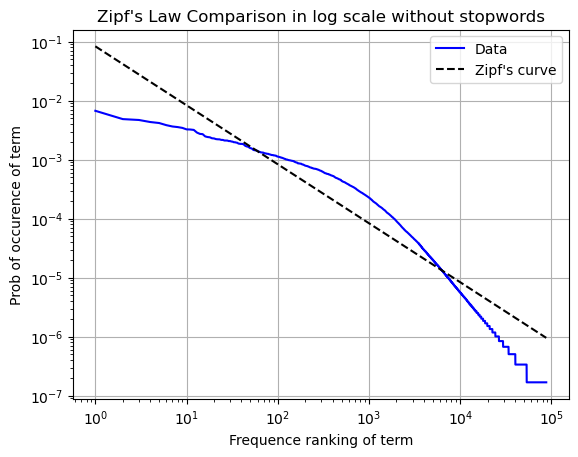

In [16]:
import numpy as np
import matplotlib.pyplot as plt


vocab_df_sorted_no_stopwords= pd.read_csv("passage_collection_stats_no_stopwords.csv")

# vocab_df_sorted_no_stopwords= df[df["Count"]>1]

display(vocab_df_sorted_no_stopwords.head(10))


Hn = np.sum(np.reciprocal(vocab_df_sorted_no_stopwords["rank"]))

zipf_freq = np.reciprocal(vocab_df_sorted_no_stopwords["rank"] * Hn)

plt.title("Zipf's Law Comparison in log scale without stopwords")
plt.xlabel("Frequence ranking of term")
plt.ylabel("Prob of occurence of term")
plt.loglog(
    vocab_df_sorted_no_stopwords["rank"],
    vocab_df_sorted_no_stopwords["Freq"],
    color="blue",
    label="Data",
)
plt.loglog(
    vocab_df_sorted_no_stopwords["rank"],
    zipf_freq,
    linestyle="--",
    color="black",
    label="Zipf's curve",
)
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

In [37]:
Hn

11.958487972264438

In [36]:
from scipy.optimize import curve_fit

def zipf_func(f, Hn):
    return np.reciprocal(f* Hn)

y= Hn
result = curve_fit(zipf_func,vocab_df_sorted_no_stopwords["Freq"], y, p0=[0.56])
p = result[0]

print(p)

[416634.83983577]
